# Download image for using.

In [1]:
# install gdown
!pip install gdown

In [2]:
# install image
!gdown '1M3BqiQ4DHtQkFTRzGuKHe8SV3FS_0Eu5'


Downloading...
From: https://drive.google.com/uc?id=1M3BqiQ4DHtQkFTRzGuKHe8SV3FS_0Eu5
To: /content/Dogg.jpg
100% 223k/223k [00:00<00:00, 6.46MB/s]


#Section 1 : Import libraries and read image data.

1.1) Import neccessary libraries.



In [3]:
#Answer your code here
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # To display images in Google Colab
import pandas as pd
from pandas import DataFrame


1.2) Read image

In [4]:
#Answer your code here
path = '/content/Dogg.jpg'
img = cv2.imread(path)

1.3) Show image

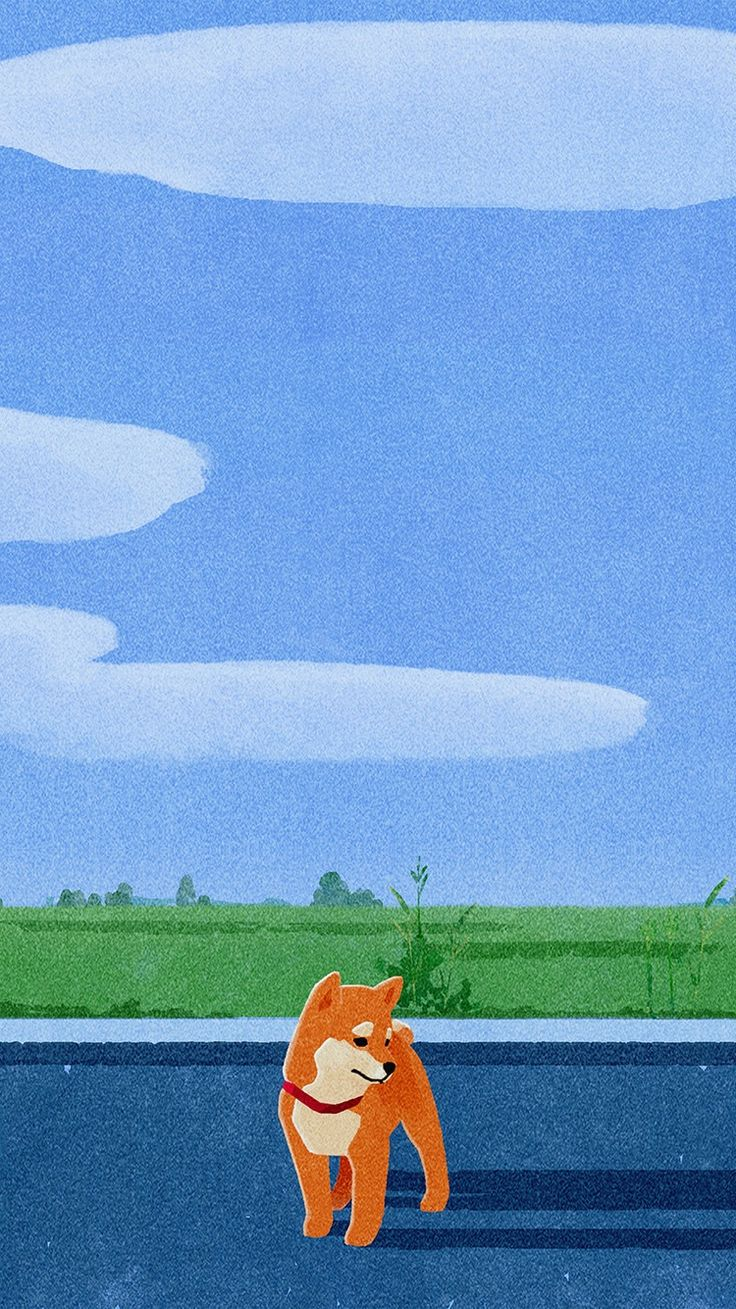

In [5]:
#Answer your code here
cv2_imshow(img)

1.4) Read image to numpy array and show array shape.

In [6]:
#Answer your code here
img_array = np.array(img)
print("Array Shape:", img_array.shape) # H, W, C


Array Shape: (1309, 736, 3)


# Section 2 : Convert original image to other color space and show result using matplotlib

2.1) Convert original image to YCrCb and HSV.

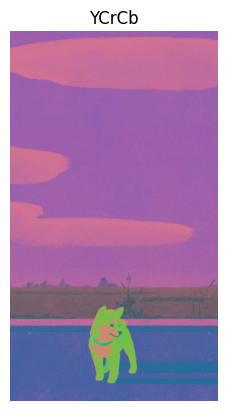

In [7]:
#Answer your code here (For show result of YCrCb)
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.imshow(img_ycbcr)
plt.title("YCrCb")
plt.axis("off")
plt.show()


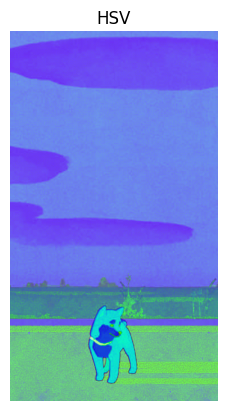

In [8]:
#Answer your code here (For show result of HSV)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.title("HSV")
plt.axis("off")
plt.show()

2.2) Show each channel of (2.1 result of both YCrCb and HSV) in gray using matplotlib

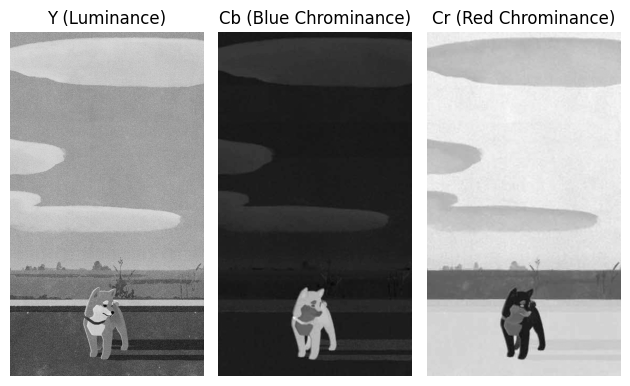

In [9]:
#Answer your code here (For show result of YCrCb)
Y, Cb, Cr = cv2.split(img_ycbcr)

# Display Y (Luminance) channel
plt.subplot(1, 3, 1)
plt.imshow(Y, cmap="gray")
plt.title("Y (Luminance)")
plt.axis("off")

# Display Cb (Blue Chrominance) channel
plt.subplot(1, 3, 2)
plt.imshow(Cb, cmap="gray")
plt.title("Cb (Blue Chrominance)")
plt.axis("off")

# Display Cr (Red Chrominance) channel
plt.subplot(1, 3, 3)
plt.imshow(Cr, cmap="gray")
plt.title("Cr (Red Chrominance)")
plt.axis("off")

plt.tight_layout()
plt.show()

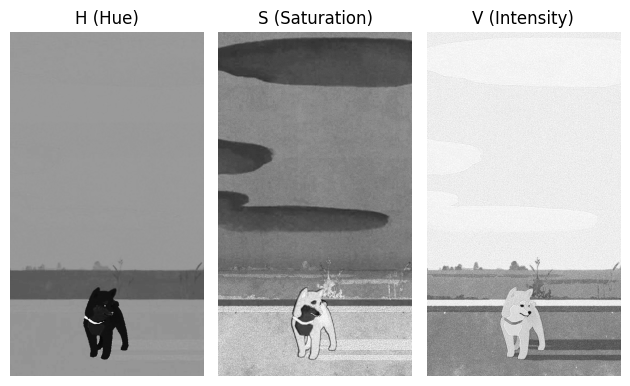

In [10]:
#Answer your code here (For show result of HSV)
H, S, V = cv2.split(img_hsv)

plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title("H (Hue)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title("S (Saturation)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title("V (Intensity)")
plt.axis("off")

plt.tight_layout()
plt.show()


# Section 3 : Reshape color space (YCrCb and HSV) to matrix size nx3 (2D) and show statistic values by using EDA tools.

3.1) Reshape color space (YCrCb and HSV) to matrix size nx3 (2D)

In [11]:
#Answer your code here (For show result of YCrCb)
n = img_ycbcr.shape[0] * img_ycbcr.shape[1]
ycbcr_matrix = img_ycbcr.reshape((n, 3))
df_ycbcr = pd.DataFrame(ycbcr_matrix, columns=['Y', 'Cb', 'Cr'])

display(df_ycbcr.head(5))

# display(df_ycbcr.describe())


Y  Cb   Cr
0  158  96  174
1  149  96  174
2  152  96  174
3  171  96  174
4  176  96  173

In [12]:
#Answer your code here (For show result of HSV)
n = img_hsv.shape[0] * img_hsv.shape[1]
hsv_matrix = img_hsv.reshape((n, 3))
df_hsv = pd.DataFrame(hsv_matrix, columns=['H', 'S', 'V'])

display(df_hsv.head(5))

# display(df_hsv.describe())


H    S    V
0  108  135  240
1  108  140  231
2  108  138  234
3  108  128  253
4  107  124  255

3.2) Show plot(YCrCb and HSV) by using EDA tools.

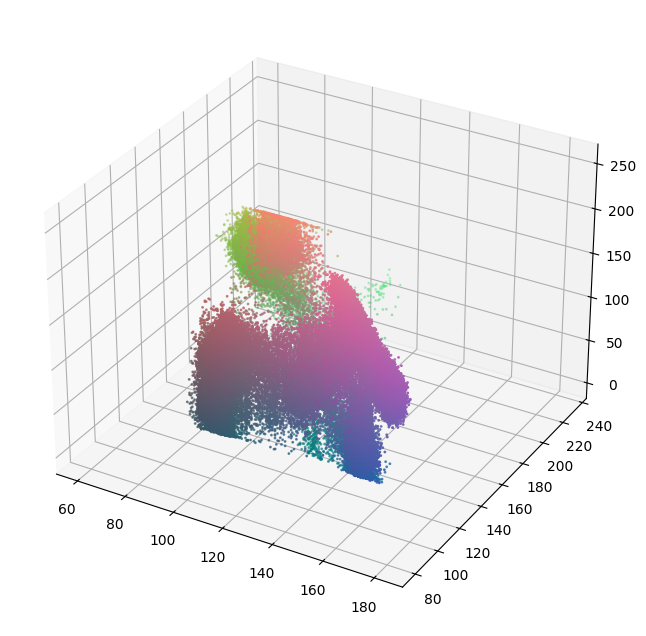

In [20]:
#Answer your code here (For show result of YCrCb)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_ycbcr[["Cr"]], df_ycbcr[["Cb"]], df_ycbcr[["Y"]], c=ycbcr_matrix / 255.0, s=1)

Y_flat = df_ycbcr[["Cr"]]
Cb_flat = df_ycbcr[["Cb"]]
Cr_flat = df_ycbcr[["Y"]]

colors = ycbcr_matrix.reshape(-1, 3) / 255.0
fig.show()


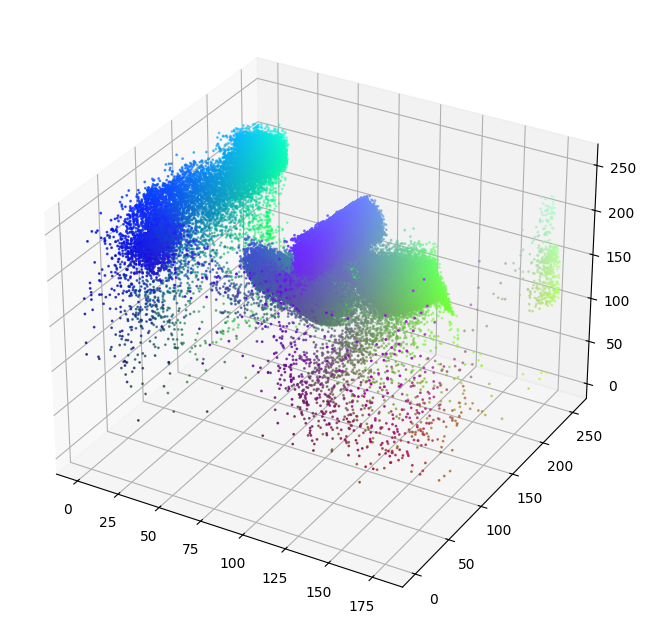

In [22]:
#Answer your code here (For show result of HSV)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_hsv[["H"]], df_hsv[["S"]], df_hsv[["V"]], c=hsv_matrix / 255.0, s=1)

Y_flat = df_hsv[["H"]]
Cb_flat = df_hsv[["S"]]
Cr_flat = df_hsv[["V"]]

colors = ycbcr_matrix.reshape(-1, 3) / 255.0
fig.show()


# Section 4 : Linear function with image

4.1) Explain definition of linear function variable 'a' and 'b' from equation 'ax + b'.

ตอบ
A คือ constrast และ
B คือ brightness



4.2) If you want to adjust image to become darker than original image by using linear function, which variable should you adjust ?

ตอบ B



#Section 5 : Crop and save image.

5.1) Please crop image into the following  result and save in jpg

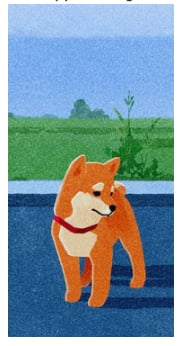

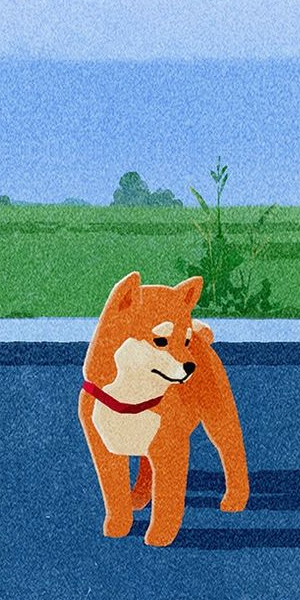

File saved at: ./cropped_image1.npy
File saved as JPG at: ./cropped_image1.jpg


In [16]:
# Fixed Region Crop
# Step 1: Define cropping coordinates
start_row, end_row = 700, 1300  # Define height range
start_col, end_col = 200, 500  # Define width range

# Step 2: Crop the image using NumPy slicing
cropped_image1 = img[start_row:end_row, start_col:end_col]

# Step 3: Display the cropped image
cv2_imshow(cropped_image1)

save_path = './cropped_image1.npy'
np.save(save_path, cropped_image1)
print(f"File saved at: {save_path}")

# Save the cropped image in .jpg format
jpg_save_path = './cropped_image1.jpg'
cv2.imwrite(jpg_save_path, cropped_image1)
print(f"File saved as JPG at: {jpg_save_path}")



# Section 6. Make image brighter
* read image
* convert to target color space
* apply your logic
* convert back to RGB (if need)
* show the image before and after change

## 6.1 RGB color space

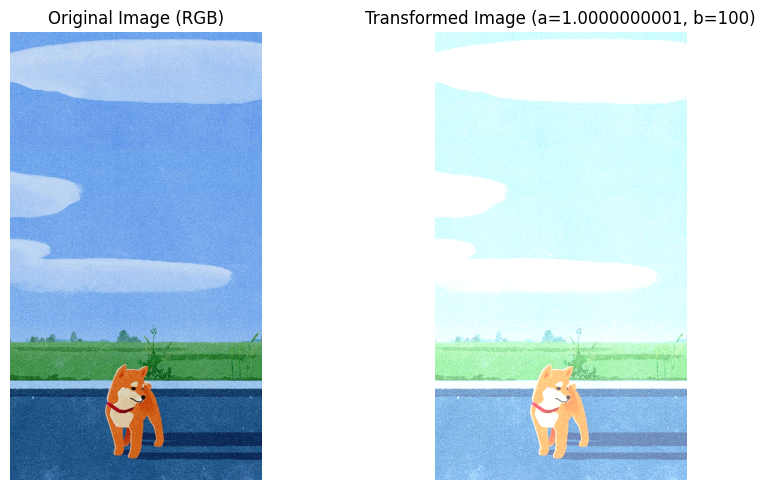

In [17]:
#Answer your code here.

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# linear function: f(x)=ax+b
R, G, B = cv2.split(img_rgb)

# Apply linear transformations
a = 1+1e-10  # Multiplication constant (scaling factor) ## contrast
b = 100   # Addition constant (offset) ## Brightness

R_transformed = np.clip(a * R + b, 0, 255).astype(np.uint8)
G_transformed = np.clip(a * G + b, 0, 255).astype(np.uint8)
B_transformed = np.clip(a * B + b, 0, 255).astype(np.uint8)

# Merge the transformed channels back into an image
image_transformed = cv2.merge([R_transformed, G_transformed, B_transformed])

# Visualize original and transformed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed)
plt.title(f"Transformed Image (a={a}, b={b})")
plt.axis("off")

plt.tight_layout()
plt.show()


## 6.2 HSV color space

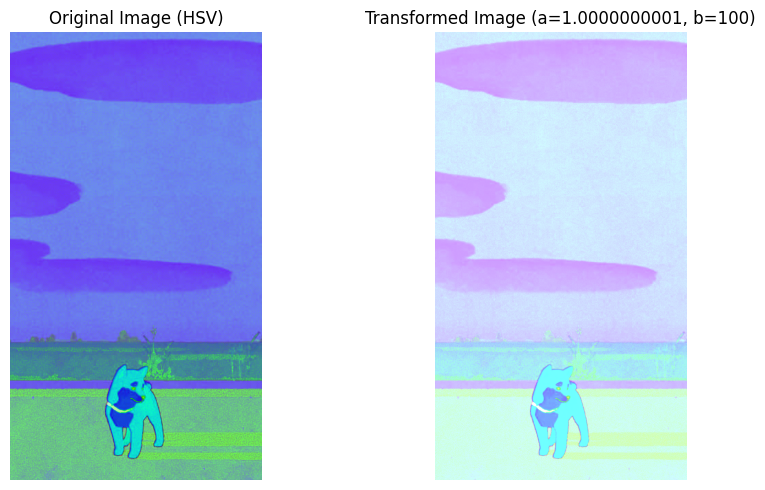

In [18]:
#Answer your code here.


# linear function: f(x)=ax+b
H, S, V = cv2.split(img_hsv)

# Apply linear transformations
a = 1+1e-10  # Multiplication constant (scaling factor) ## contrast
b = 100   # Addition constant (offset) ## Brightness

H_transformed = np.clip(a * H + b, 0, 255).astype(np.uint8)
S_transformed = np.clip(a * S + b, 0, 255).astype(np.uint8)
V_transformed = np.clip(a * V + b, 0, 255).astype(np.uint8)

# Merge the transformed channels back into an image
image_transformed = cv2.merge([H_transformed, S_transformed, V_transformed])

# Visualize original and transformed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_hsv)
plt.title("Original Image (HSV)")
plt.axis("off")

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed)
plt.title(f"Transformed Image (a={a}, b={b})")
plt.axis("off")

plt.tight_layout()
plt.show()

# 6.3 YCbCr color space

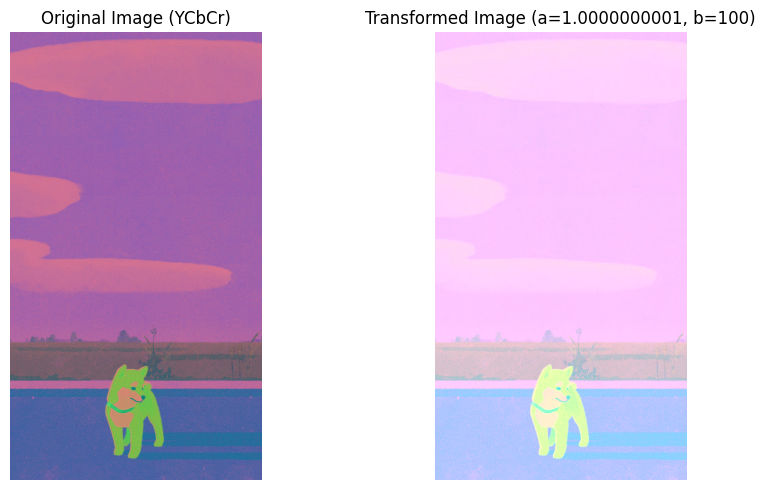

In [19]:
#Answer your code here.


# linear function: f(x)=ax+b
Y, Cb, Cr = cv2.split(img_ycbcr)

# Apply linear transformations
a = 1+1e-10  # Multiplication constant (scaling factor) ## contrast
b = 100   # Addition constant (offset) ## Brightness

Y_transformed = np.clip(a * Y + b, 0, 255).astype(np.uint8)
Cb_transformed = np.clip(a * Cb + b, 0, 255).astype(np.uint8)
Cr_transformed = np.clip(a * Cr + b, 0, 255).astype(np.uint8)

# Merge the transformed channels back into an image
image_transformed = cv2.merge([Y_transformed, Cb_transformed, Cr_transformed])

# Visualize original and transformed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_ycbcr)
plt.title("Original Image (YCbCr)")
plt.axis("off")

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed)
plt.title(f"Transformed Image (a={a}, b={b})")
plt.axis("off")

plt.tight_layout()
plt.show()